## Read me
#### How to use
1. Put all data which read from Data Collector App into file "data". **Totally 8 files: battery.csv, cpuFreq.csv, cpuTime.csv, gpu.csv, memory.csv, net.csv, temperature.csv, time.csv**. Data generation frequency: 1/s.
2. Put all heat map photos which read from front side IR camera into file "FLIROne_front". Photo generation frequency: 1/5s.
3. Put all heat map photos which read from back side IR camera into file "FLIROne_back". Photo generation frequency: 1/5s.
4. "Cell" -> "Run All"

***Data preprocessing takes time, especially in the case of abstracting specific data from numpy array of heat map. It take 0.5s at least to deal with one heat map. Just be patient :) I will try to optimise it later... By Xiaoyang***

#### Code structure
1. Data preprocessing (Done)
2. ML Model. I set a Linear Regression here as a "Hello World" model, feel free to replace whatever model you like : )

###### Author: Xiaoyang Zhang      @@@      Email: xzhan211@binghamton.edu

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Time csv

In [3]:
Time = pd.read_csv('data/time.csv', sep='\t', names=["time"])
Time.drop(Time.index[len(Time)-1], inplace = True)
Time['time'] = Time['time'].astype(int)

In [4]:
Time.head()

,time
0,163144
1,163145
2,163146
3,163147
4,163148


In [5]:
Time.tail()

,time
913,165029
914,165030
915,165031
916,165032
917,165034


### Battery csv

In [6]:
Battery = pd.read_csv('data/battery.csv', sep=',', names=["bat_voltage", "bat_temp", "bat_capacity", "bat_current"])
Battery.drop(Battery.index[len(Battery)-1], inplace = True)
for x in list(Battery.columns.values):
    Battery[x] = Battery[x].astype(float)

In [7]:
Battery['bat_power'] = (Battery.bat_voltage / 1000) * (Battery.bat_current / 1000) * 1000

In [8]:
Battery.head()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
0,4153.0,37.0,92.0,545.0,2263.385
1,4156.0,37.0,92.0,474.0,1969.944
2,4151.0,37.0,92.0,378.0,1569.078
3,4146.0,37.0,92.0,679.0,2815.134
4,4164.0,37.0,92.0,399.0,1661.436


In [9]:
Battery.tail()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
913,3933.0,47.0,77.0,1551.0,6100.083
914,3935.0,47.0,77.0,1414.0,5564.090
915,3941.0,47.0,77.0,1374.0,5414.934
916,3945.0,47.0,77.0,1146.0,4520.970
917,3957.0,47.0,77.0,1050.0,4154.850


### GPU csv

In [10]:
GPU = pd.read_csv('data/gpu.csv', sep=',', names=["gpu_usage", "gpu_temp", "gpu_freq"])
GPU.drop(GPU.index[len(GPU)-1], inplace = True)
for x in list(GPU.columns.values):
    GPU[x] = GPU[x].astype(float)

In [11]:
GPU.head()

,gpu_usage,gpu_temp,gpu_freq
0,15.0,45.9,257000000.0
1,2.0,46.3,257000000.0
2,6.0,46.7,257000000.0
3,12.0,46.3,257000000.0
4,22.0,45.9,257000000.0


In [12]:
GPU.tail()

,gpu_usage,gpu_temp,gpu_freq
913,63.0,67.9,257000000.0
914,67.0,67.9,257000000.0
915,60.0,66.7,257000000.0
916,18.0,66.0,257000000.0
917,4.0,64.8,257000000.0


### Net csv (KB/s)

In [13]:
Net = pd.read_csv('data/net.csv', sep=',', names=["tx", "rx"])
Net.drop(Net.index[len(Net)-1], inplace = True)
for x in list(Net.columns.values):
    Net[x] = Net[x].astype(float)

In [14]:
Net.head()

,tx,rx
0,23390.848,5425122.000
1,0.000,0.000
2,0.086,0.064
3,0.327,0.287
4,0.000,0.000


In [15]:
Net.tail()

,tx,rx
913,1.844,0.945
914,3.144,2.185
915,5.465,1.583
916,0.238,0.851
917,0.000,0.000


### CPU frequency csv (kHz)

In [16]:
size = len(pd.read_csv('data/cpuFreq.csv').columns);

In [17]:
titles = []
for i in range(0, size):
    titles.append('f_cpu' + str(i))

CPUFreq = pd.read_csv('data/cpuFreq.csv', sep=',', names=titles)
CPUFreq.drop(CPUFreq.index[len(CPUFreq)-1], inplace = True)
for x in list(CPUFreq.columns.values):
    CPUFreq[x] = CPUFreq[x].astype(float)

In [18]:
CPUFreq.head()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
0,1785600.0,1785600.0,1785600.0,1785600.0,1286400.0,1286400.0,1286400.0,2016000.0
1,1785600.0,1785600.0,1785600.0,1785600.0,2227200.0,2227200.0,2227200.0,1804800.0
2,1785600.0,1785600.0,1785600.0,1785600.0,1401600.0,1401600.0,1401600.0,1286400.0
3,1785600.0,1785600.0,1785600.0,1785600.0,1612800.0,1612800.0,1612800.0,1286400.0
4,1785600.0,1785600.0,1785600.0,1785600.0,1401600.0,1401600.0,1401600.0,1286400.0


In [19]:
CPUFreq.tail()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
913,1785600.0,1785600.0,1785600.0,1785600.0,2016000.0,2016000.0,2016000.0,2016000.0
914,1785600.0,1785600.0,1785600.0,1785600.0,2016000.0,2016000.0,2016000.0,2016000.0
915,1785600.0,1785600.0,1785600.0,1785600.0,2016000.0,2016000.0,2016000.0,2016000.0
916,1785600.0,1785600.0,1785600.0,1785600.0,1920000.0,2016000.0,2016000.0,2016000.0
917,1785600.0,1785600.0,1785600.0,1785600.0,1920000.0,1920000.0,1920000.0,2016000.0


### CPU time csv

In [20]:
colSize = len(pd.read_csv('data/cpuTime.csv').columns);
titles = []
for i in range(0, colSize):
    if i == 0:
        titles.append('cpu')
    else:
        titles.append('cpu' + str(i-1))
#titles

In [21]:
CPUTime = pd.read_csv('data/cpuTime.csv', sep=',', names=titles)
CPUTime.drop(CPUTime.index[len(CPUTime)-1], inplace = True)

In [22]:
CPUTime.head()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
0,315473 52112 298384 5618318 5638 46521 24920 ...,46609 10696 54333 656950 413 14647 4134 0 0 0,45357 10769 56937 657509 393 6036 11474 0 0 0,44659 4600 56631 672135 521 4870 5234 0 0 0,43880 4801 56391 663133 345 17210 2601 0 0 0,35378 5787 19064 739608 575 916 345 0 0 0,38388 6099 22841 732429 522 1110 368 0 0 0,37371 6286 22533 733613 553 1082 367 0 0 0,23828 3071 9651 762938 2313 646 394 0 0 0
1,315604 52114 298446 5619004 5638 46527 24922 ...,46660 10696 54342 656996 413 14650 4135 0 0 0,45384 10769 56953 657578 393 6037 11474 0 0 0,44675 4600 56646 672212 521 4871 5234 0 0 0,43902 4801 56405 663204 346 17211 2602 0 0 0,35380 5787 19066 739713 575 916 345 0 0 0,38395 6100 22845 732530 522 1110 368 0 0 0,37375 6286 22535 733719 553 1082 367 0 0 0,23828 3071 9651 763049 2313 646 394 0 0 0
2,315757 52141 298512 5619604 5639 46534 24924 ...,46674 10709 54355 657059 413 14654 4136 0 0 0,45446 10769 56957 657618 393 6037 11474 0 0 0,44696 4600 56660 672281 521 4872 5235 0 0 0,43922 4801 56420 663270 346 17213 2602 0 0 0,35393 5787 19071 739804 575 916 345 0 0 0,38405 6103 22850 732619 522 1110 368 0 0 0,37385 6296 22541 733801 553 1082 367 0 0 0,23832 3073 9654 763147 2313 646 394 0 0 0
3,315852 52152 298553 5620359 5639 46539 24926 ...,46681 10716 54368 657141 413 14656 4136 0 0 0,45506 10770 56962 657665 393 6038 11475 0 0 0,44702 4600 56671 672375 521 4873 5236 0 0 0,43933 4801 56427 663361 346 17213 2602 0 0 0,35396 5787 19073 739915 575 916 345 0 0 0,38409 6103 22852 732727 522 1110 368 0 0 0,37388 6298 22542 733911 553 1082 367 0 0 0,23832 3073 9654 763260 2313 646 394 0 0 0
4,315991 52152 298598 5621067 5639 46546 24928 ...,46697 10716 54379 657220 413 14660 4137 0 0 0,45569 10770 56967 657710 393 6039 11475 0 0 0,44715 4600 56681 672460 521 4874 5236 0 0 0,43953 4801 56438 663440 346 17214 2602 0 0 0,35407 5787 19074 740019 575 916 345 0 0 0,38419 6103 22855 732828 522 1111 368 0 0 0,37394 6298 22545 734016 553 1082 367 0 0 0,23834 3073 9655 763371 2313 646 394 0 0 0


In [23]:
CPUTime.tail()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
913,723640 61192 432837 5910016 5732 72981 31735 ...,71492 12330 76766 706360 428 21634 5810 0 0 0,74736 13044 76615 705946 412 11411 13357 0 0 0,77804 6770 75666 719887 530 10474 5830 0 0 0,75629 6798 76618 712404 355 21008 3569 0 0 0,106197 5795 33223 764600 581 2049 784 0 0 0,108250 6582 37524 757390 537 2259 780 0 0 0,107144 6788 37063 758859 565 2228 776 0 0 0,102382 3081 19358 784566 2322 1914 825 0 0 0
914,724096 61203 433046 5910291 5732 73015 31745 ...,71527 12331 76802 706406 428 21644 5811 0 0 0,74766 13051 76647 705990 412 11417 13361 0 0 0,77845 6773 75695 719928 530 10481 5830 0 0 0,75660 6798 76652 712452 355 21012 3572 0 0 0,106270 5795 33248 764628 581 2051 784 0 0 0,108336 6582 37541 757409 537 2261 781 0 0 0,107217 6788 37087 758886 565 2229 777 0 0 0,102471 3081 19370 784589 2322 1916 826 0 0 0
915,724588 61269 433314 5910422 5732 73052 31754 ...,71575 12336 76840 706427 428 21655 5811 0 0 0,74817 13062 76684 706005 412 11424 13364 0 0 0,77902 6780 75731 719944 530 10490 5831 0 0 0,75700 6825 76686 712469 355 21017 3574 0 0 0,106342 5796 33286 764642 581 2052 785 0 0 0,108418 6587 37567 757420 537 2262 782 0 0 0,107292 6795 37118 758897 565 2231 777 0 0 0,102537 3085 19398 784614 2322 1917 827 0 0 0
916,724932 61286 433494 5910723 5732 73081 31762 ...,71652 12336 76864 706427 428 21665 5813 0 0 0,74906 13062 76699 706005 412 11430 13366 0 0 0,77928 6781 75755 719990 530 10496 5832 0 0 0,75723 6828 76717 712515 355 21020 3576 0 0 0,106372 5797 33307 764697 581 2053 785 0 0 0,108450 6591 37597 757465 537 2263 782 0 0 0,107326 6802 37140 758947 565 2232 778 0 0 0,102571 3086 19412 784674 2322 1918 827 0 0 0
917,725214 61291 433720 5911046 5733 73109 31768 ...,71703 12336 76911 706427 428 21675 5815 0 0 0,74982 13062 76726 706005 412 11436 13369 0 0 0,77964 6781 75784 720022 530 10502 5832 0 0 0,75748 6829 76759 712546 355 21024 3576 0 0 0,106396 5798 33328 764762 581 2053 785 0 0 0,108475 6591 37615 757529 537 2264 782 0 0 0,107349 6804 37162 759008 565 2233 778 0 0 0,102592 3087 19431 784745 2322 1918 827 0 0 0


In [24]:
rowSize = len(CPUTime.index)
seven = 7

In [25]:
threeD = []
for c in range(0, colSize):
    twoD = []
    for r in range(0, rowSize):
        line = CPUTime.iloc[r][c]
        arr = line.split()
        oneD = []
        for i in range(0, seven):
            oneD.append(int(arr[i]))
        twoD.append(oneD)
    threeD.append(twoD) 

In [26]:
threeD[0]

[[315473, 52112, 298384, 5618318, 5638, 46521, 24920],
 [315604, 52114, 298446, 5619004, 5638, 46527, 24922],
 [315757, 52141, 298512, 5619604, 5639, 46534, 24924],
 [315852, 52152, 298553, 5620359, 5639, 46539, 24926],
 [315991, 52152, 298598, 5621067, 5639, 46546, 24928],
 [316125, 52164, 298673, 5621753, 5639, 46553, 24930],
 [316267, 52171, 298749, 5622460, 5640, 46561, 24934],
 [316421, 52190, 298821, 5623088, 5640, 46570, 24936],
 [316619, 52200, 298883, 5623714, 5641, 46580, 24941],
 [316891, 52207, 298957, 5624218, 5641, 46589, 24948],
 [317105, 52234, 299029, 5624760, 5641, 46597, 24954],
 [317245, 52241, 299078, 5625435, 5641, 46605, 24958],
 [317359, 52248, 299111, 5626149, 5642, 46613, 24963],
 [317490, 52255, 299137, 5626863, 5642, 46622, 24966],
 [317600, 52268, 299166, 5627581, 5642, 46631, 24968],
 [317680, 52273, 299185, 5628343, 5642, 46637, 24970],
 [317757, 52278, 299213, 5629095, 5642, 46645, 24972],
 [317866, 52283, 299257, 5629782, 5642, 46653, 24976],
 [318008, 

In [27]:
for i in range(0, colSize):
    for j in range(rowSize-1, 0, -1):
        for k in range(0, seven):
            threeD[i][j][k] = threeD[i][j][k] - threeD[i][j-1][k]

In [28]:
threeD[0]

[[315473, 52112, 298384, 5618318, 5638, 46521, 24920],
 [131, 2, 62, 686, 0, 6, 2],
 [153, 27, 66, 600, 1, 7, 2],
 [95, 11, 41, 755, 0, 5, 2],
 [139, 0, 45, 708, 0, 7, 2],
 [134, 12, 75, 686, 0, 7, 2],
 [142, 7, 76, 707, 1, 8, 4],
 [154, 19, 72, 628, 0, 9, 2],
 [198, 10, 62, 626, 1, 10, 5],
 [272, 7, 74, 504, 0, 9, 7],
 [214, 27, 72, 542, 0, 8, 6],
 [140, 7, 49, 675, 0, 8, 4],
 [114, 7, 33, 714, 1, 8, 5],
 [131, 7, 26, 714, 0, 9, 3],
 [110, 13, 29, 718, 0, 9, 2],
 [80, 5, 19, 762, 0, 6, 2],
 [77, 5, 28, 752, 0, 8, 2],
 [109, 5, 44, 687, 0, 8, 4],
 [142, 15, 51, 666, 0, 8, 4],
 [149, 22, 76, 609, 4, 9, 3],
 [272, 14, 189, 371, 13, 20, 4],
 [316, 7, 128, 437, 1, 20, 4],
 [318, 14, 120, 419, 0, 20, 4],
 [293, 4, 102, 447, 0, 19, 5],
 [317, 37, 143, 368, 1, 21, 5],
 [321, 48, 141, 362, 0, 20, 5],
 [334, 82, 174, 269, 4, 23, 7],
 [404, 109, 214, 136, 1, 24, 5],
 [329, 28, 124, 390, 0, 20, 5],
 [337, 7, 127, 387, 1, 20, 6],
 [318, 5, 111, 420, 0, 20, 5],
 [293, 9, 111, 424, 0, 19, 5],
 [288,

#### user  nice  system  idle  iowait  irq  softirq

In [29]:
final3D = []
for i in range(0, colSize):
    twoD = pd.DataFrame(columns='total user% nice% system% idle% iowait% irq% softirq%'.split())
    index = 0
    for j in range(0, rowSize):
        line = threeD[i][j]
        total = sum(line)
        oneD = []
        oneD.append(total)
        for k in range(0, seven):
            oneD.append(round(threeD[i][j][k]*100 / total))
        twoD.loc[index] = oneD
        index += 1
    final3D.append(twoD)

In [30]:
final3D[0].head()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
0,6361366,5,1,5,88,0,1,0
1,889,15,0,7,77,0,1,0
2,856,18,3,8,70,0,1,0
3,909,10,1,5,83,0,1,0
4,901,15,0,5,79,0,1,0


In [31]:
final3D[0].tail()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
913,970,51,1,14,31,0,3,1
914,995,46,1,21,28,0,3,1
915,1003,49,7,27,13,0,4,1
916,879,39,2,20,34,0,3,1
917,871,32,1,26,37,0,3,1


### Memory csv (kB)

In [32]:
Memory = pd.read_csv('data/memory.csv')

In [33]:
colSize = len(Memory.columns)
titles = []
for i in range(0, colSize):
    titles.append(Memory.iloc[0][i].split(':')[0])

In [34]:
Memory = pd.read_csv('data/memory.csv', sep=',', names=titles)
rowSize = len(Memory)
for i in range(0, rowSize):
    for j in range(0, colSize):
        Memory.iloc[i][j] = Memory.iloc[i][j].split(':')[1].strip().split()[0]

In [35]:
for x in list(Memory.columns.values):
    Memory[x] = Memory[x].astype(float)

In [36]:
Memory.head()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
0,16.0,5598060.0,361980.0,2469512.0,1324.0,2346836.0,27176.0,1666880.0,1387308.0,451068.0,...,360512.0,122588.0,0.0,4896176.0,81087224.0,263061440.0,107916.0,0.0,233472.0,36692.0
1,16.0,5598060.0,351320.0,2458888.0,1324.0,2346880.0,26780.0,1677240.0,1385428.0,463064.0,...,360704.0,78296.0,0.0,4896176.0,81087204.0,263061440.0,107916.0,0.0,233472.0,37676.0
2,16.0,5598060.0,357008.0,2464716.0,1324.0,2347144.0,26736.0,1664168.0,1391764.0,449732.0,...,360704.0,89144.0,0.0,4896176.0,81099948.0,263061440.0,107868.0,0.0,233472.0,38516.0
3,16.0,5598060.0,344120.0,2453336.0,1324.0,2348568.0,26724.0,1672968.0,1396720.0,457060.0,...,360704.0,89332.0,0.0,4896176.0,81103000.0,263061440.0,107812.0,0.0,233472.0,38464.0
4,16.0,5598060.0,352676.0,2461896.0,1324.0,2348596.0,26720.0,1665952.0,1396744.0,450044.0,...,360704.0,89332.0,0.0,4896176.0,81103000.0,263061440.0,107812.0,0.0,233472.0,38472.0


In [37]:
Memory.tail()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
913,15.0,5598060.0,201284.0,1463688.0,5532.0,1512752.0,6516.0,1781364.0,824812.0,870676.0,...,933160.0,44496.0,0.0,4896176.0,85535256.0,263061440.0,110392.0,0.0,233472.0,1916.0
914,15.0,5598060.0,163304.0,1425232.0,5532.0,1512232.0,6516.0,1781836.0,825412.0,871128.0,...,969316.0,100572.0,0.0,4896176.0,85532528.0,263061440.0,110416.0,0.0,233472.0,688.0
915,15.0,5598060.0,144124.0,1405676.0,5532.0,1512152.0,6516.0,1764664.0,829948.0,854596.0,...,999076.0,64636.0,0.0,4896176.0,85468096.0,263061440.0,110512.0,0.0,233472.0,932.0
916,15.0,5598060.0,130348.0,1392276.0,5532.0,1512184.0,6516.0,1767100.0,830340.0,856920.0,...,1009948.0,28784.0,0.0,4896176.0,85468096.0,263061440.0,110496.0,0.0,233472.0,264.0
917,15.0,5598060.0,141996.0,1403184.0,5532.0,1511692.0,6516.0,1760164.0,827492.0,849960.0,...,1009500.0,67616.0,0.0,4896176.0,85468096.0,263061440.0,110296.0,0.0,233472.0,1396.0


### Temperature csv

In [38]:
temp = pd.read_csv('data/temperature.csv')
colSize = len(temp.columns)
rowSize = len(temp)

In [39]:
titles = []
for i in range(0, colSize):
    titles.append(temp.iloc[rowSize-1][i])
len(titles)

88

In [40]:
Temperature = pd.read_csv('data/temperature.csv', sep=',', names=titles)
Temperature.drop(Temperature.index[len(Temperature)-1], inplace = True)
for x in list(Temperature.columns.values):
    Temperature[x] = Temperature[x].astype(float)

In [41]:
Temperature.head()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
0,46300.0,50200.0,49000.0,48200.0,48600.0,50200.0,49000.0,49800.0,48600.0,47800.0,...,37875.0,37075.0,37071.0,16.0,0.0,37800.0,36000.0,42204.0,37000.0,37800.0
1,46300.0,50200.0,50200.0,49800.0,50500.0,51300.0,51300.0,52900.0,50200.0,49000.0,...,37923.0,37078.0,37081.0,16.0,0.0,37900.0,36000.0,42204.0,37000.0,37900.0
2,47100.0,50500.0,51700.0,50500.0,51300.0,50900.0,50900.0,47500.0,48200.0,48600.0,...,37919.0,37064.0,37064.0,16.0,0.0,37900.0,36000.0,42204.0,37000.0,37900.0
3,46700.0,50900.0,50500.0,49800.0,50500.0,50200.0,49800.0,46700.0,47800.0,47800.0,...,37892.0,37081.0,37078.0,16.0,0.0,37900.0,36000.0,42204.0,37000.0,37900.0
4,46300.0,49000.0,49000.0,49800.0,48200.0,49000.0,49000.0,45900.0,47500.0,47100.0,...,37886.0,37081.0,37078.0,16.0,0.0,37900.0,36000.0,42204.0,37000.0,37900.0


In [42]:
Temperature.tail()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
913,68700.0,72200.0,72200.0,71400.0,71000.0,72600.0,71800.0,69900.0,71400.0,70600.0,...,44980.0,44467.0,44471.0,16.0,0.0,47700.0,45000.0,56208.0,44400.0,47700.0
914,69500.0,72600.0,72600.0,71400.0,71400.0,72600.0,72200.0,70200.0,72200.0,71800.0,...,44950.0,44448.0,44448.0,16.0,0.0,47800.0,45000.0,55041.0,44400.0,47800.0
915,68300.0,72600.0,71800.0,71000.0,71000.0,72200.0,71800.0,69100.0,71000.0,71800.0,...,44924.0,44414.0,44422.0,16.0,0.0,47700.0,45000.0,56208.0,44400.0,47700.0
916,66800.0,71000.0,70600.0,69900.0,69900.0,70200.0,70600.0,68700.0,69100.0,68700.0,...,44939.0,44392.0,44384.0,16.0,0.0,47700.0,45000.0,56208.0,44300.0,47700.0
917,65600.0,69900.0,69500.0,69100.0,68700.0,69500.0,69500.0,67900.0,68700.0,68300.0,...,44946.0,44343.0,44343.0,16.0,0.0,47700.0,45000.0,55041.0,44300.0,47700.0


### Combine tables to final data set

In [43]:
#memory
print(Memory.columns)
selectedMemCol = ['Thread quantity', 'MemFree', 'MemAvailable']
PartMemory = Memory[selectedMemCol]

Index(['Thread quantity', 'MemTotal', 'MemFree', 'MemAvailable', 'Buffers',
       'Cached', 'SwapCached', 'Active', 'Inactive', 'Active(anon)',
       'Inactive(anon)', 'Active(file)', 'Inactive(file)', 'Unevictable',
       'Mlocked', 'SwapTotal', 'SwapFree', 'Dirty', 'Writeback', 'AnonPages',
       'Mapped', 'Shmem', 'Slab', 'SReclaimable', 'SUnreclaim', 'KernelStack',
       'ShadowCallStack', 'PageTables', 'NFS_Unstable', 'Bounce', 'ION_heap',
       'ION_heap_pool', 'WritebackTmp', 'CommitLimit', 'Committed_AS',
       'VmallocTotal', 'VmallocUsed', 'VmallocChunk', 'CmaTotal', 'CmaFree'],
      dtype='object')


In [44]:
#temperature
#print(Temperature.columns)
selectedTempCol = ['cpu-1-0-usr', 'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr', 'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr', 'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm']
PartTemp = Temperature[selectedTempCol]

In [45]:
#time
idleTitle = []
cpuQuantity = len(final3D)
for i in range(0, cpuQuantity):
    if i==0:
        idleTitle.append("cpuIdle")
    else:
        idleTitle.append("cpuIdle" + str(i-1))

PartTime = pd.DataFrame(columns=idleTitle)
for r in range(0, rowSize):
    oneLine = []
    for n in range(0, cpuQuantity):
        oneLine.append(final3D[n]["idle%"][r])
    PartTime.loc[r] = oneLine

In [46]:
for x in list(PartTime.columns.values):
    PartTime[x] = PartTime[x].astype(float)
PartTime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 9 columns):
cpuIdle     918 non-null float64
cpuIdle0    918 non-null float64
cpuIdle1    918 non-null float64
cpuIdle2    918 non-null float64
cpuIdle3    918 non-null float64
cpuIdle4    918 non-null float64
cpuIdle5    918 non-null float64
cpuIdle6    918 non-null float64
cpuIdle7    918 non-null float64
dtypes: float64(9)
memory usage: 71.7 KB


In [47]:
PartTime.head()

,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,88.0,83.0,83.0,85.0,84.0,92.0,91.0,91.0,95.0
1,77.0,42.0,61.0,71.0,65.0,96.0,89.0,95.0,100.0
2,70.0,58.0,38.0,65.0,64.0,83.0,83.0,76.0,92.0
3,83.0,74.0,41.0,83.0,83.0,96.0,95.0,95.0,100.0
4,79.0,71.0,39.0,78.0,71.0,90.0,88.0,92.0,97.0


In [48]:
#combine all dataframe
LeftSet = pd.concat([Time, Battery, GPU, Net, CPUFreq, PartMemory, PartTemp, PartTime], axis=1)
#LeftSet = pd.concat([Time, Battery, GPU], axis=1)
LeftSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,xo-therm,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,163144,4153.0,37.0,92.0,545.0,2263.385,15.0,45.9,257000000.0,23390.848,...,42268.0,88.0,83.0,83.0,85.0,84.0,92.0,91.0,91.0,95.0
1,163145,4156.0,37.0,92.0,474.0,1969.944,2.0,46.3,257000000.0,0.000,...,42189.0,77.0,42.0,61.0,71.0,65.0,96.0,89.0,95.0,100.0
2,163146,4151.0,37.0,92.0,378.0,1569.078,6.0,46.7,257000000.0,0.086,...,42136.0,70.0,58.0,38.0,65.0,64.0,83.0,83.0,76.0,92.0
3,163147,4146.0,37.0,92.0,679.0,2815.134,12.0,46.3,257000000.0,0.327,...,42098.0,83.0,74.0,41.0,83.0,83.0,96.0,95.0,95.0,100.0
4,163148,4164.0,37.0,92.0,399.0,1661.436,22.0,45.9,257000000.0,0.000,...,42064.0,79.0,71.0,39.0,78.0,71.0,90.0,88.0,92.0,97.0


In [49]:
len(LeftSet)

918

In [50]:
LeftSet.columns

Index(['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current',
       'bat_power', 'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0',
       'f_cpu1', 'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7'],
      dtype='object')

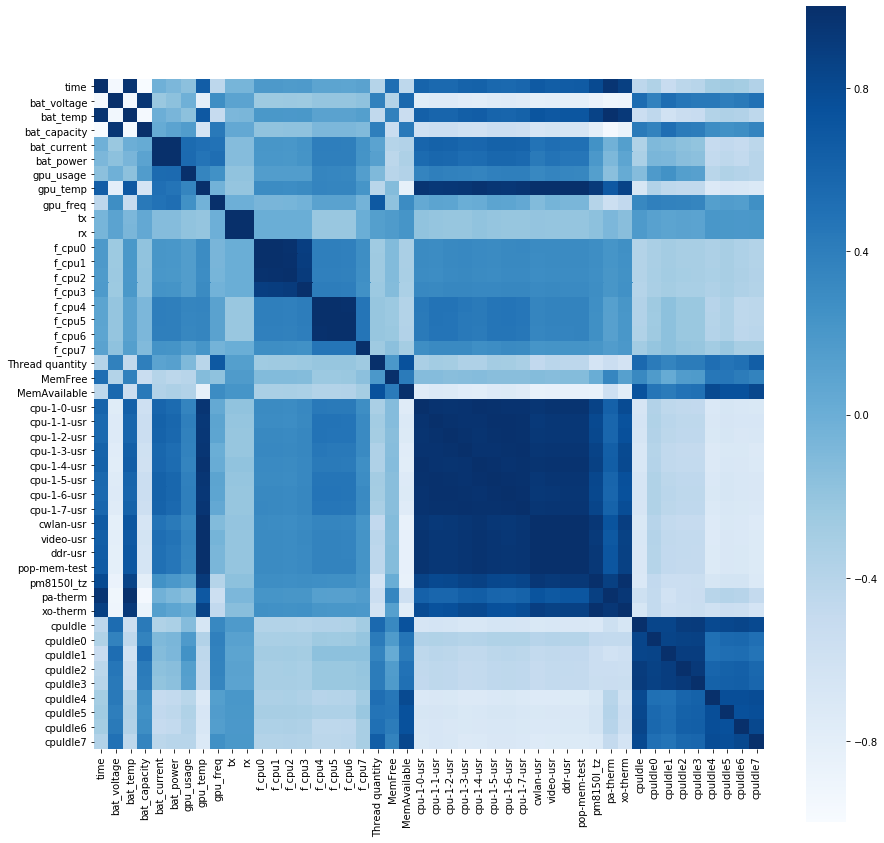

In [51]:
plt.subplots(figsize=(15, 15))
sns.heatmap(LeftSet.corr(), vmax=1, square=True, cmap="Blues")
#plt.savefig('./BluesStateRelation.png')
plt.show()

### Description about DataSet
DataSet is the final data pool.

DataSet = LeftSet + RightSet

LeftSet is the statistic data which collected from Data Collector App.

RightSet is the temperature data which abstracted from heat map photos.

**There are already plenty of important features in the pool:**

1. time: format is hhmmss
2. battery: current voltage, current, temperature, capacity
3. GPU: usage, temp, frequency
4. network: tx (upload speed), rx (download speed)
5. CPU Frequency: CPU0 ~ CPU7
6. thread quantity
7. memory: free size, available size
8. CPU Temperature: CPU0 ~ CPU7 (cpu-1-x-usr)
9. WIFI IC Temperature (cwlan-usr)
10. temperature relates to video (video-user, I don't know which hardware generates this temperature)
11. temperature relates to DDR of memory (DDR-usr)
12. temperature relates to memory (pop-mem-test)
13. temperature relates to power manager IC (pm8150l_tz)
14. temperature relates to power amplifier (pa-therm)
15. CPU idle percentage (cpuIdle, cpuidle0 ~ 7)
16. ground truth, surface temperature from smartphone (heatest_temp)

### Above part is data preprocessing

# =======================================================

### Below part is the ML model
#### How to use:
Step1: Grab features you need from DataSet to get the "X" and "y" set. "y" is the groud true set.

Step2: Pick the ML model you like, have fun : )





### X and y arrays

In [76]:
LeftSet.drop(LeftSet.index[:3], inplace=True)

In [77]:
X = LeftSet[['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current', 'bat_power',
       'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0', 'f_cpu1',
       'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7']]
#y = DataSet['heatest_temp']

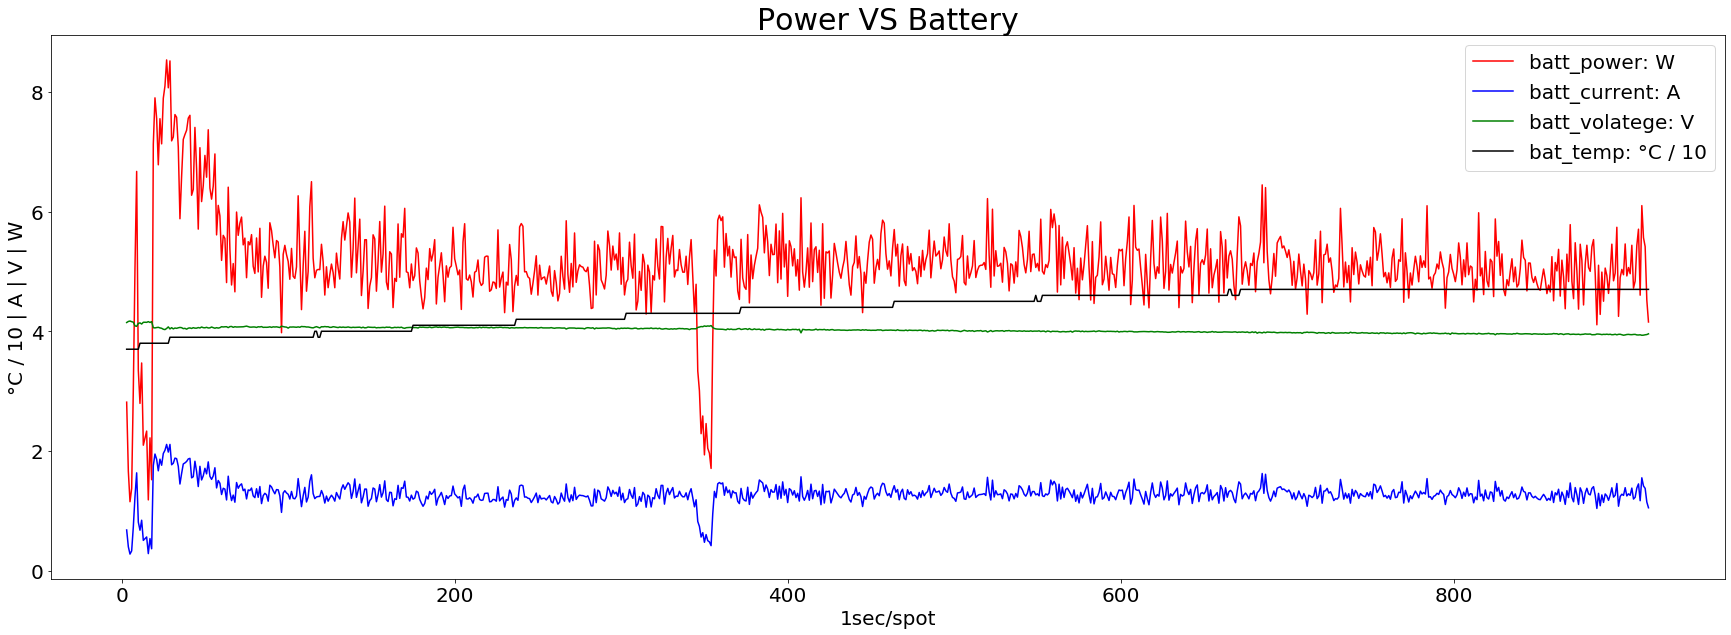

In [78]:
plt.figure(figsize=(30, 10))

plt.title('Power VS Battery', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('°C / 10 | A | V | W', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['bat_current']/1000, color='blue', label = 'batt_current: A')
plt.plot(X['bat_voltage']/1000, color='green', label = 'batt_volatege: V')
plt.plot(X['bat_temp']/10, color='black', label = 'bat_temp: °C / 10')

plt.legend(loc=1, prop={'size': 20})

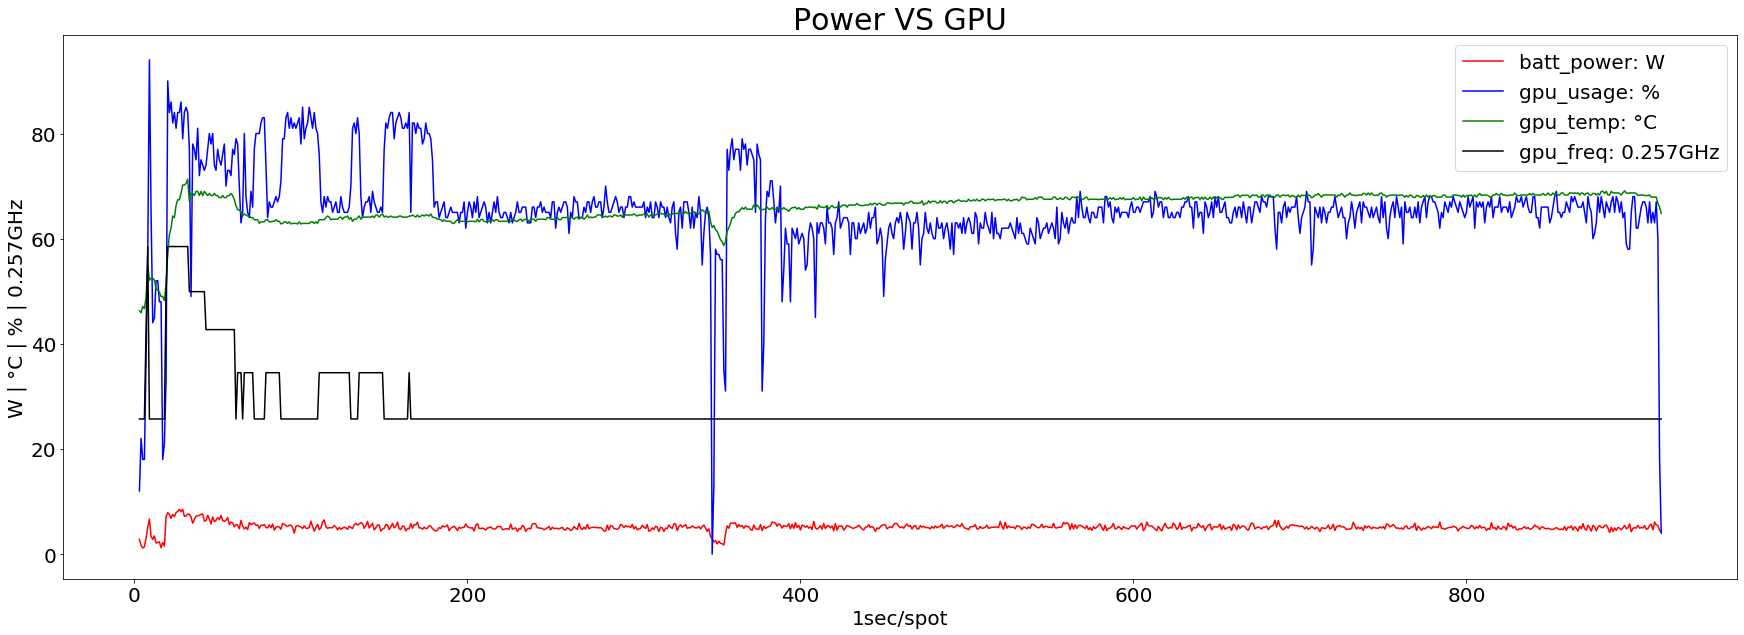

In [79]:
plt.figure(figsize=(30, 10))

plt.title('Power VS GPU', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('W | °C | % | 0.257GHz', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['gpu_usage'], color='blue', label = 'gpu_usage: %')
plt.plot(X['gpu_temp'], color='green', label = 'gpu_temp: °C')
plt.plot(X['gpu_freq']/10000000, color='black', label = 'gpu_freq: 0.257GHz')

plt.legend(loc=1, prop={'size': 20})

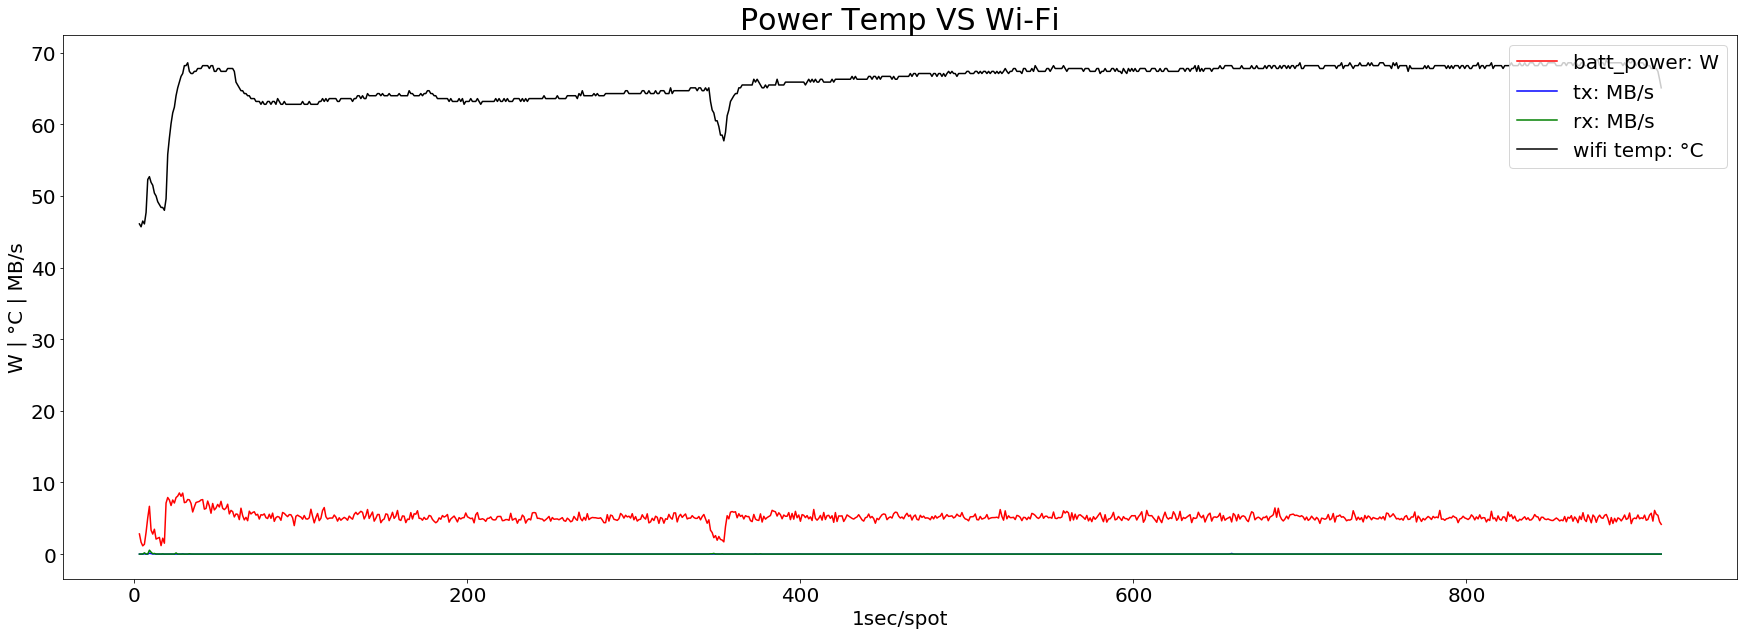

In [81]:
plt.figure(figsize=(30, 10))

plt.title('Power Temp VS Wi-Fi', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('W | °C | MB/s', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['tx']/1000, color='blue', label = 'tx: MB/s')
plt.plot(X['rx']/1000, color='green', label = 'rx: MB/s')
plt.plot(X['cwlan-usr']/1000, color='black', label = 'wifi temp: °C')

plt.legend(loc=1, prop={'size': 20})

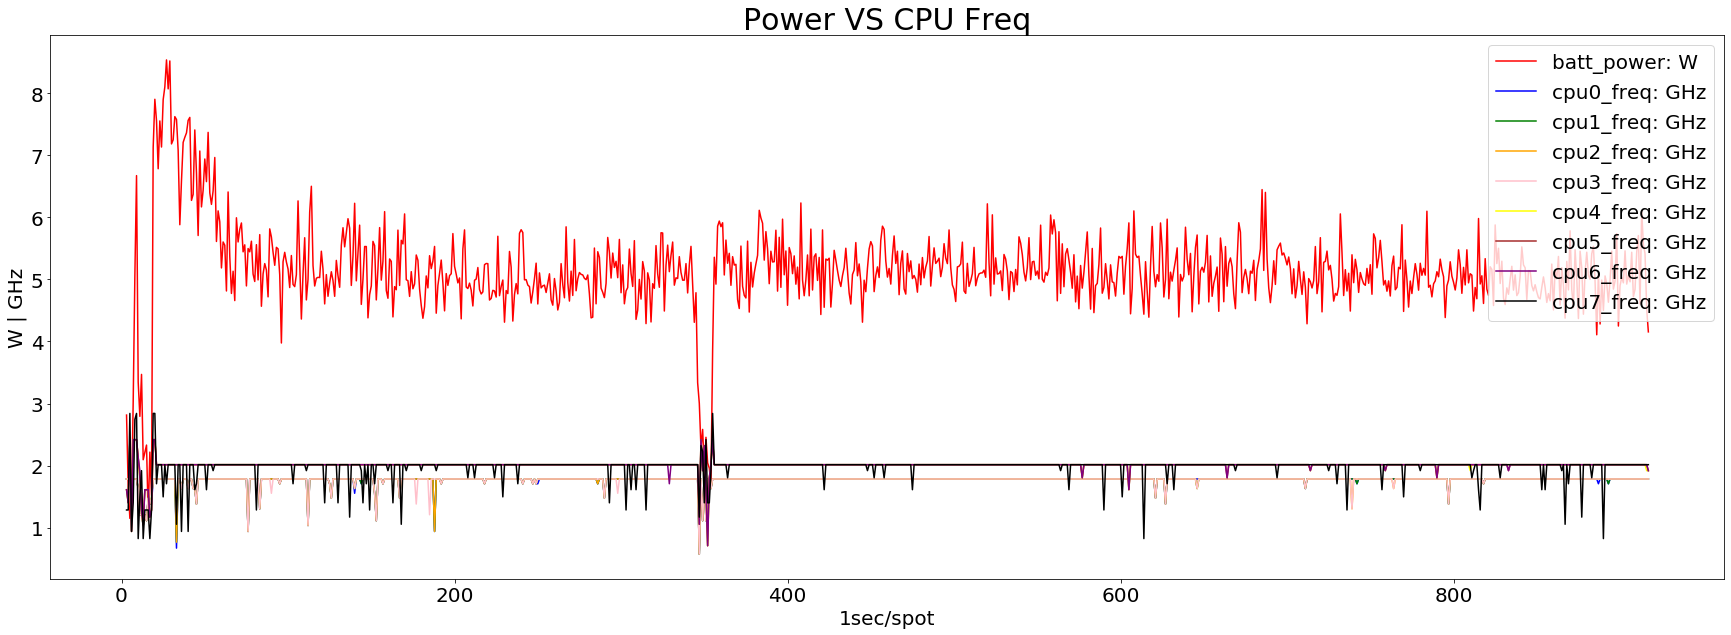

In [82]:
plt.figure(figsize=(30, 10))

plt.title('Power VS CPU Freq', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('W | GHz', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['f_cpu0']/1000000, color='blue', label = 'cpu0_freq: GHz')
plt.plot(X['f_cpu1']/1000000, color='green', label = 'cpu1_freq: GHz')
plt.plot(X['f_cpu2']/1000000, color='orange', label = 'cpu2_freq: GHz')
plt.plot(X['f_cpu3']/1000000, color='pink', label = 'cpu3_freq: GHz')
plt.plot(X['f_cpu4']/1000000, color='yellow', label = 'cpu4_freq: GHz')
plt.plot(X['f_cpu5']/1000000, color='brown', label = 'cpu5_freq: GHz')
plt.plot(X['f_cpu6']/1000000, color='purple', label = 'cpu6_freq: GHz')
plt.plot(X['f_cpu7']/1000000, color='black', label = 'cpu7_freq: GHz')

plt.legend(loc=1, prop={'size': 20})

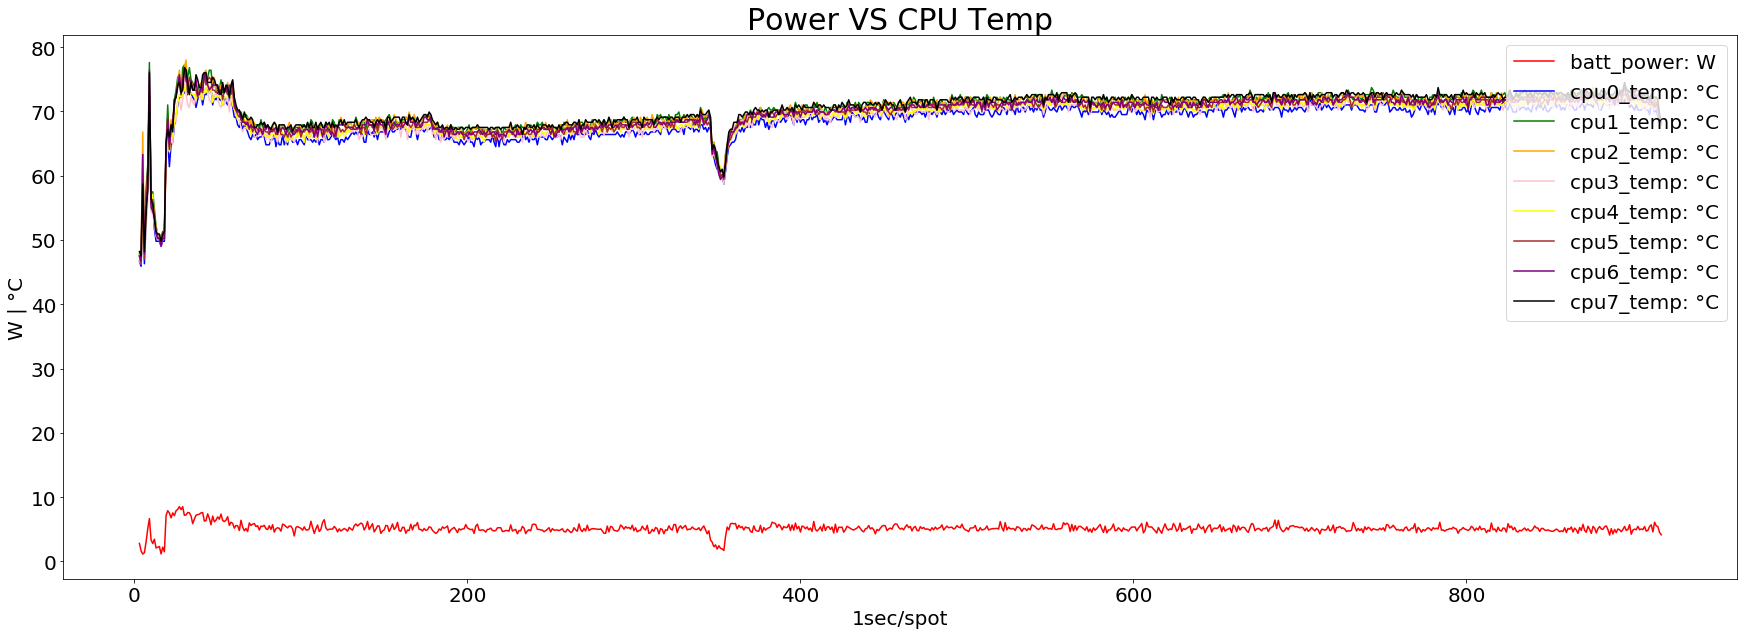

In [83]:
plt.figure(figsize=(30, 10))

plt.title('Power VS CPU Temp', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('W | °C', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['cpu-1-0-usr']/1000, color='blue', label = 'cpu0_temp: °C')
plt.plot(X['cpu-1-1-usr']/1000, color='green', label = 'cpu1_temp: °C')
plt.plot(X['cpu-1-2-usr']/1000, color='orange', label = 'cpu2_temp: °C')
plt.plot(X['cpu-1-3-usr']/1000, color='pink', label = 'cpu3_temp: °C')
plt.plot(X['cpu-1-4-usr']/1000, color='yellow', label = 'cpu4_temp: °C')
plt.plot(X['cpu-1-5-usr']/1000, color='brown', label = 'cpu5_temp: °C')
plt.plot(X['cpu-1-6-usr']/1000, color='purple', label = 'cpu6_temp: °C')
plt.plot(X['cpu-1-7-usr']/1000, color='black', label = 'cpu7_temp: °C')

plt.legend(loc=1, prop={'size': 20})

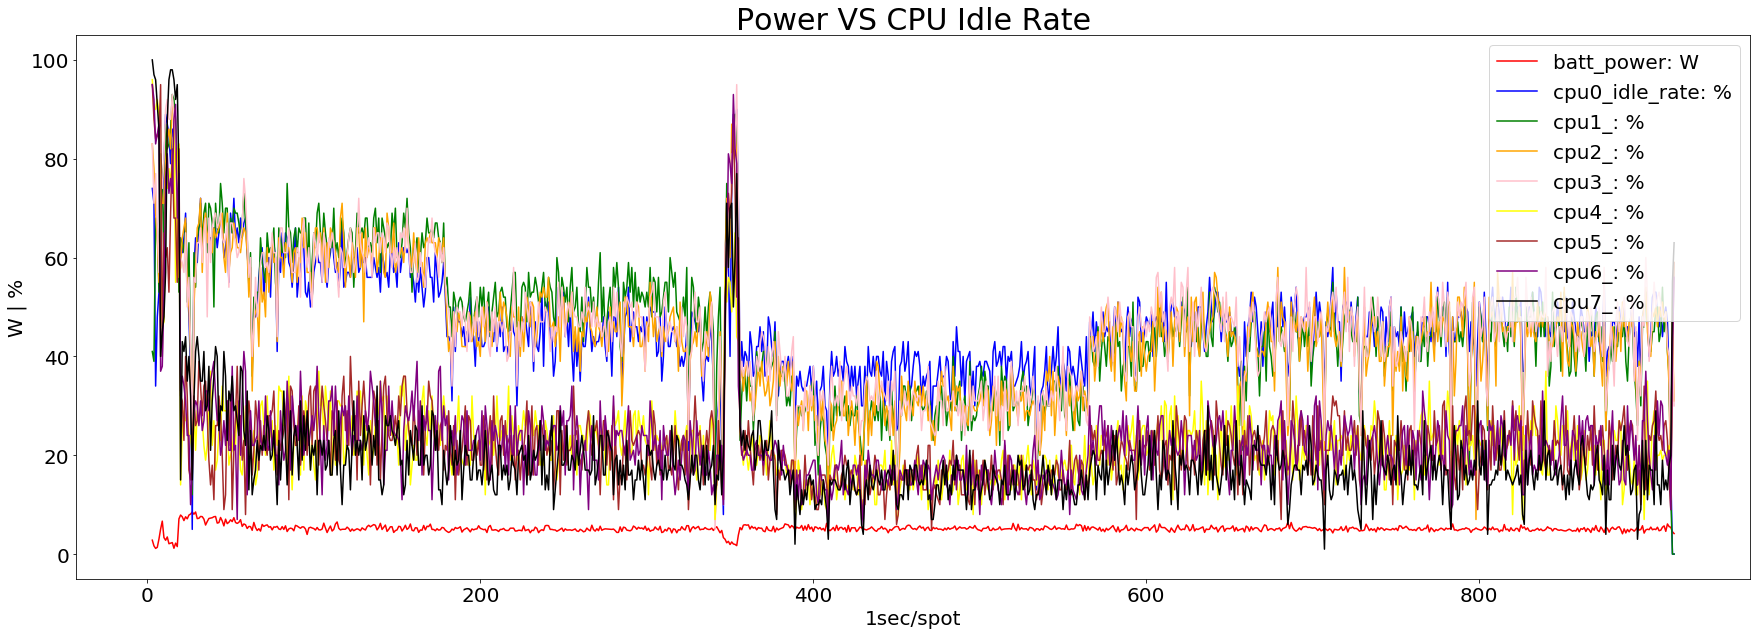

In [84]:
plt.figure(figsize=(30, 10))

plt.title('Power VS CPU Idle Rate', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('W | %', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['cpuIdle0'], color='blue', label = 'cpu0_idle_rate: %')
plt.plot(X['cpuIdle1'], color='green', label = 'cpu1_: %')
plt.plot(X['cpuIdle2'], color='orange', label = 'cpu2_: %')
plt.plot(X['cpuIdle3'], color='pink', label = 'cpu3_: %')
plt.plot(X['cpuIdle4'], color='yellow', label = 'cpu4_: %')
plt.plot(X['cpuIdle5'], color='brown', label = 'cpu5_: %')
plt.plot(X['cpuIdle6'], color='purple', label = 'cpu6_: %')
plt.plot(X['cpuIdle7'], color='black', label = 'cpu7_: %')

plt.legend(loc=1, prop={'size': 20})

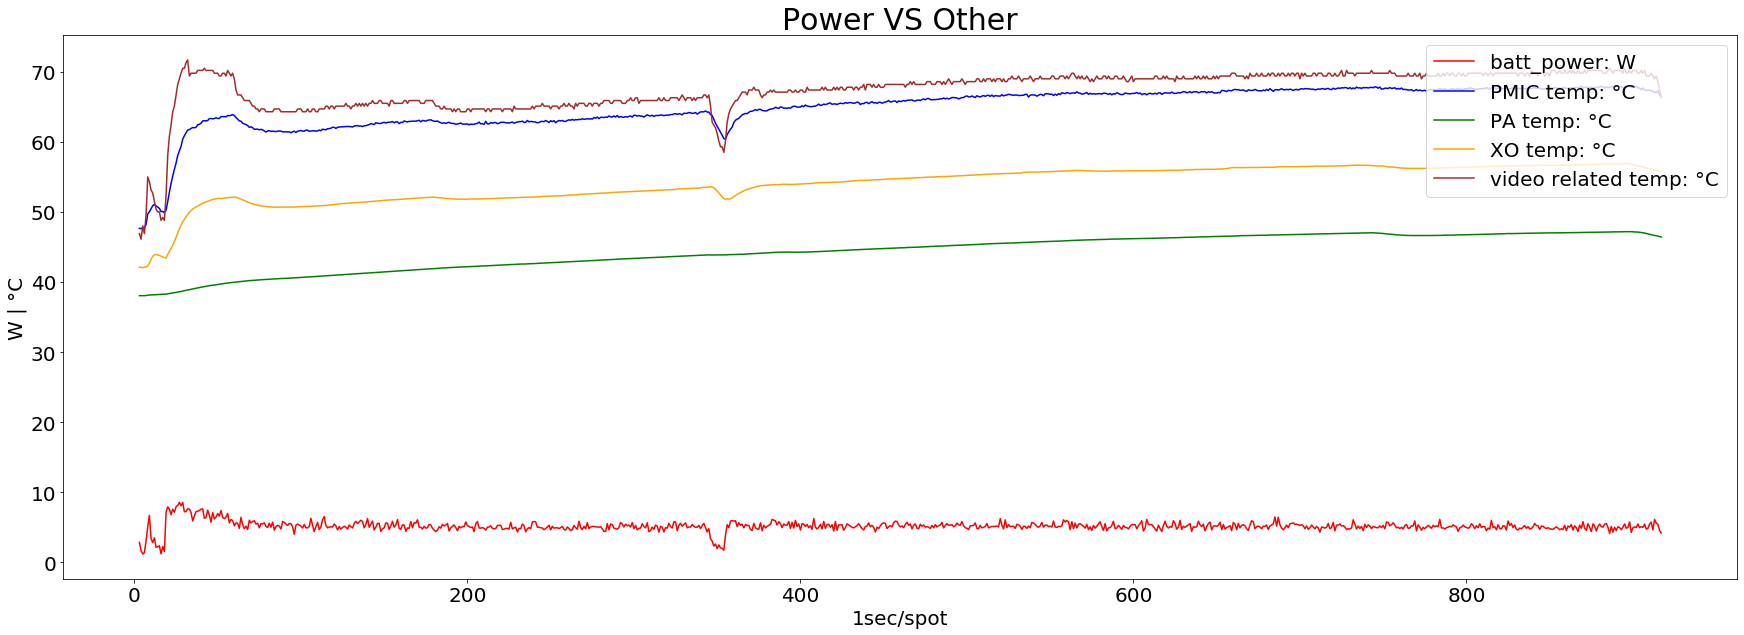

In [86]:
plt.figure(figsize=(30, 10))

plt.title('Power VS Other', fontsize=30)
plt.xlabel('1sec/spot', fontsize=20)
plt.ylabel('W | °C', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(X['bat_power']/1000, color='red', label = 'batt_power: W')
plt.plot(X['pm8150l_tz']/1000, color='blue', label = 'PMIC temp: °C')
plt.plot(X['pa-therm']/1000, color='green', label = 'PA temp: °C')
plt.plot(X['xo-therm']/1000, color='orange', label = 'XO temp: °C')
plt.plot(X['video-usr']/1000, color='brown', label = 'video related temp: °C')

plt.legend(loc=1, prop={'size': 20})